In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()


In [2]:
2.5171267342473382 / (2.5171267342473382+7.087836849232511)

0.2620652033055799

In [4]:
sub_lgbm_1 = pd.read_csv('Sub-LGBM-1.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [5]:
sub_lgbm_9 = pd.read_csv('Sub-LGBM-9.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [6]:
sub_lgbm_10 = pd.read_csv('Sub-LGBM-10.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [7]:
sub_lgbm_11 = pd.read_csv('Sub-LGBM-11.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [8]:
sub_lgbm_14 = pd.read_csv('Sub-LGBM-14.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [9]:
sub_lgbm_13 = pd.read_csv('Sub-LGBM-13.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [10]:
sub_lgbm_21 = pd.read_csv('Sub-LGBM-21.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [11]:
sub_catboost_1 = pd.read_csv('Sub-CATBOOST-1.txt', sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click_probability'])

In [12]:
def plot_data_cut(df, col, n_bins=20):
    quartiles = pd.cut(df[col], n_bins)
    grouped = df.groupby(quartiles)
    
    plt.figure(figsize=(30,15)) 
    plt.xlabel(col)
    plt.ylabel('counts in ' + col)
    nums_of_col = grouped.size()
    nums_of_col.plot.bar()

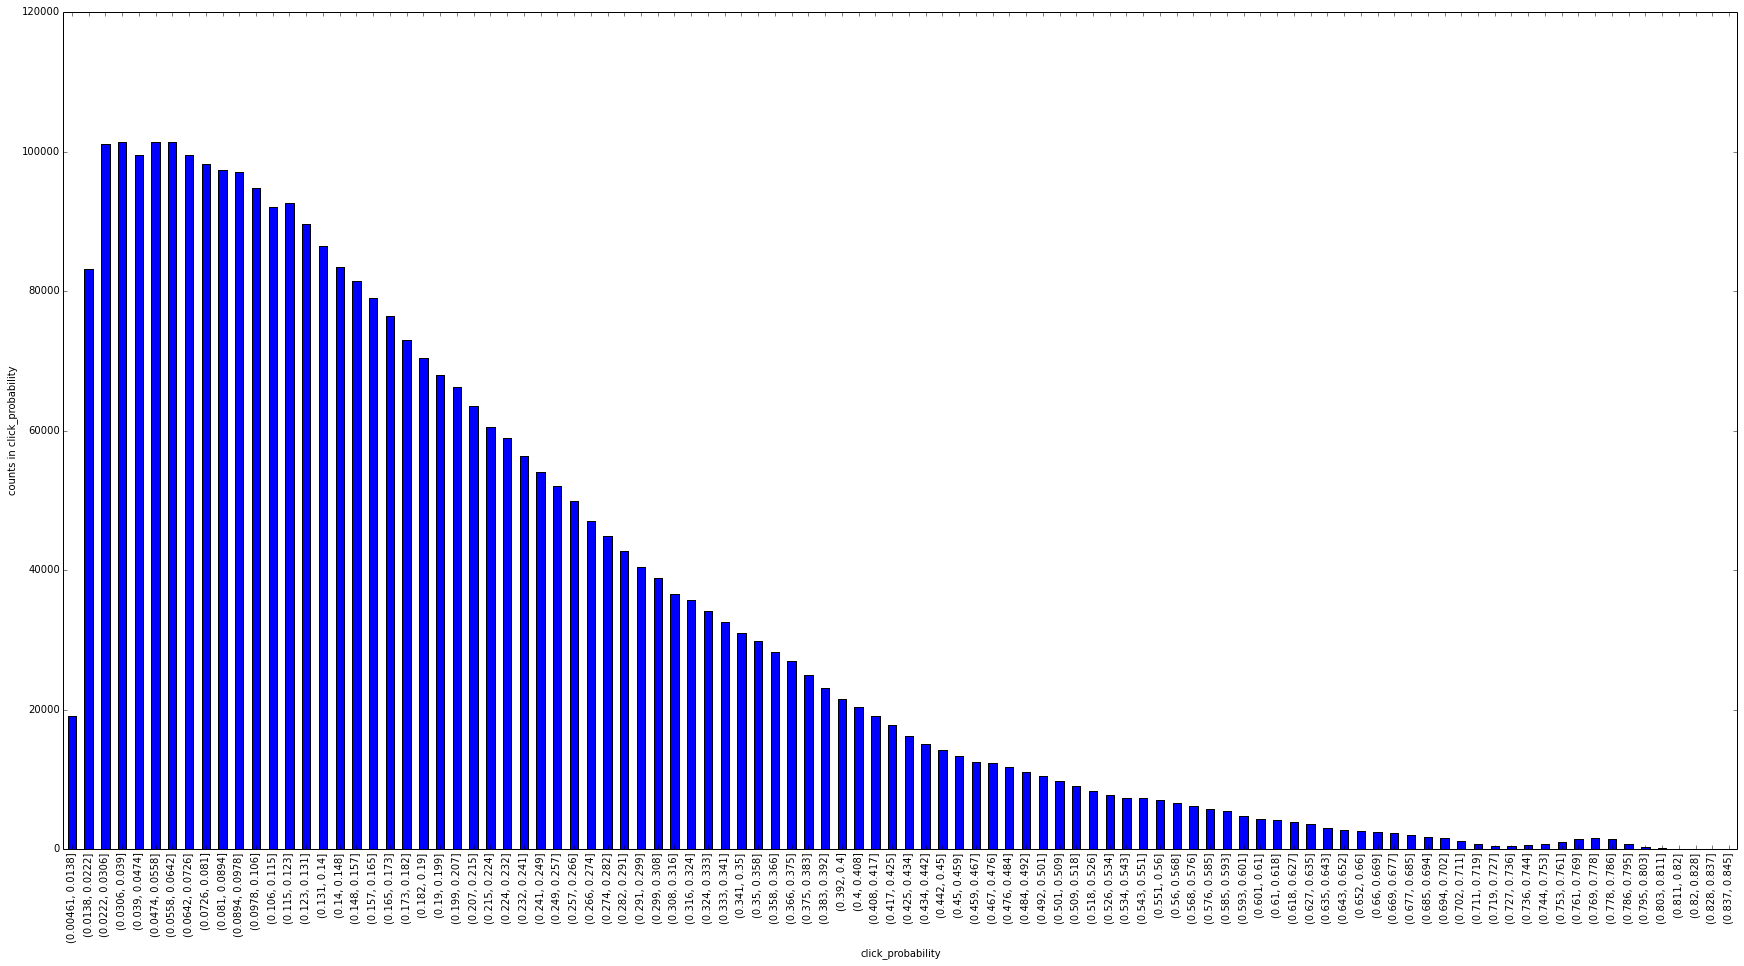

In [13]:
plot_data_cut(sub_lgbm_21, 'click_probability', 100)

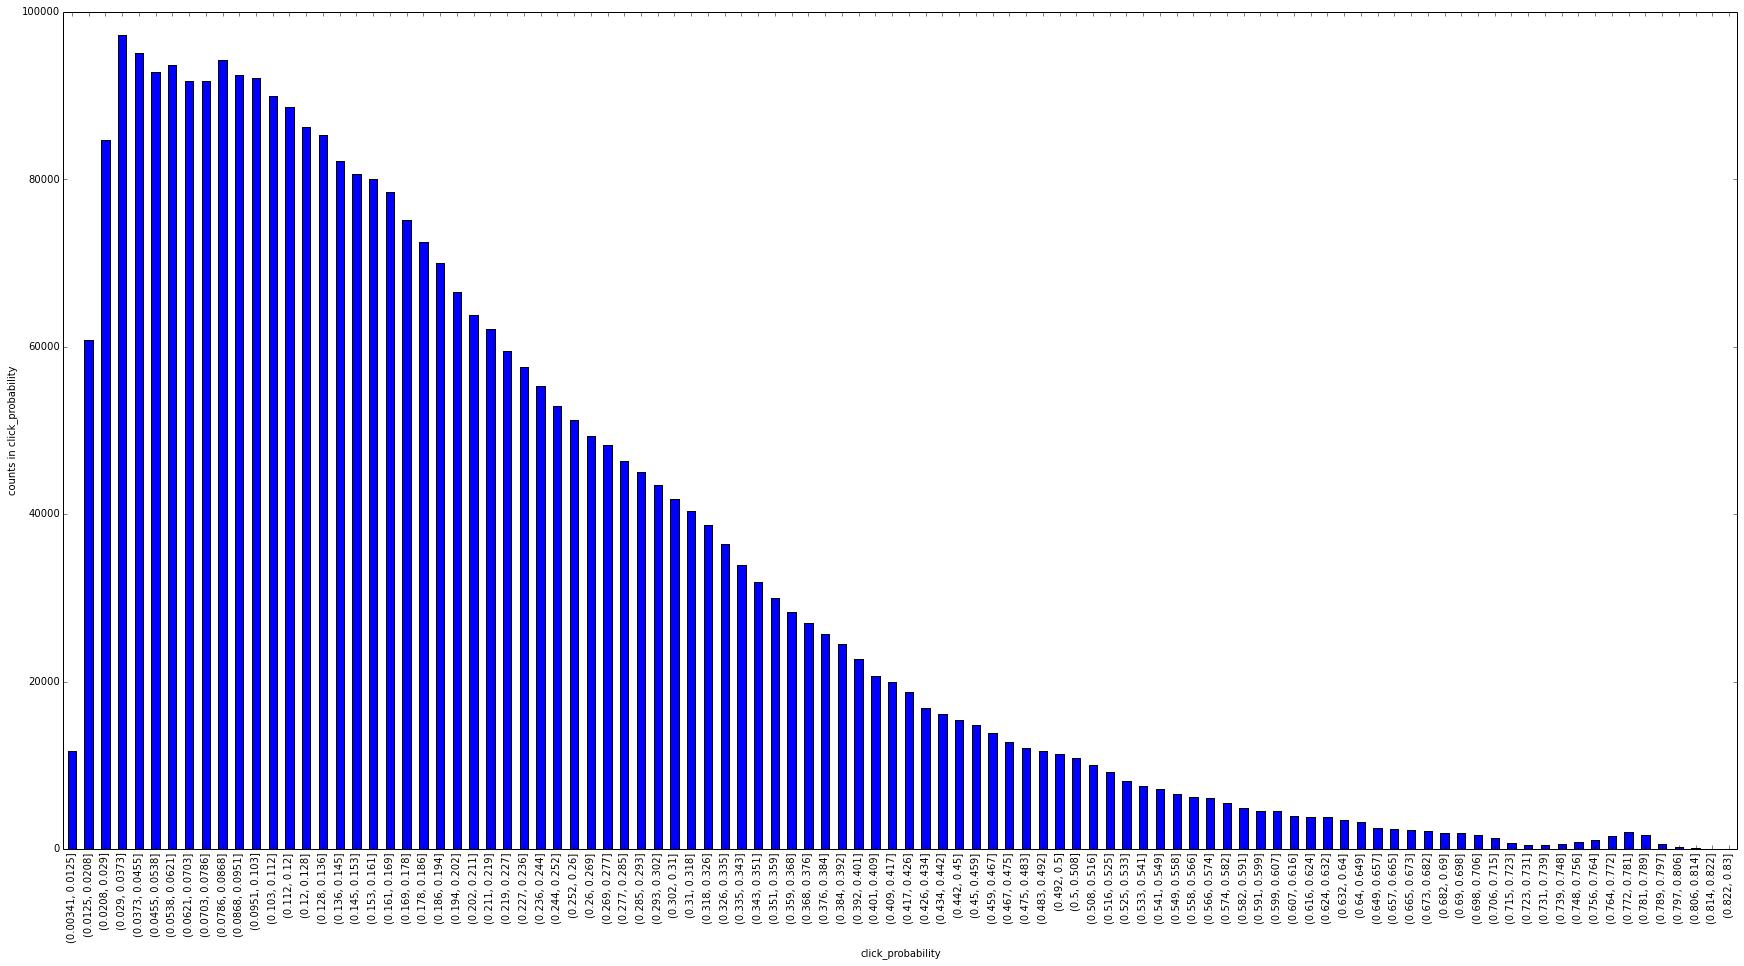

In [11]:
plot_data_cut(sub_lgbm_1, 'click_probability', 100)

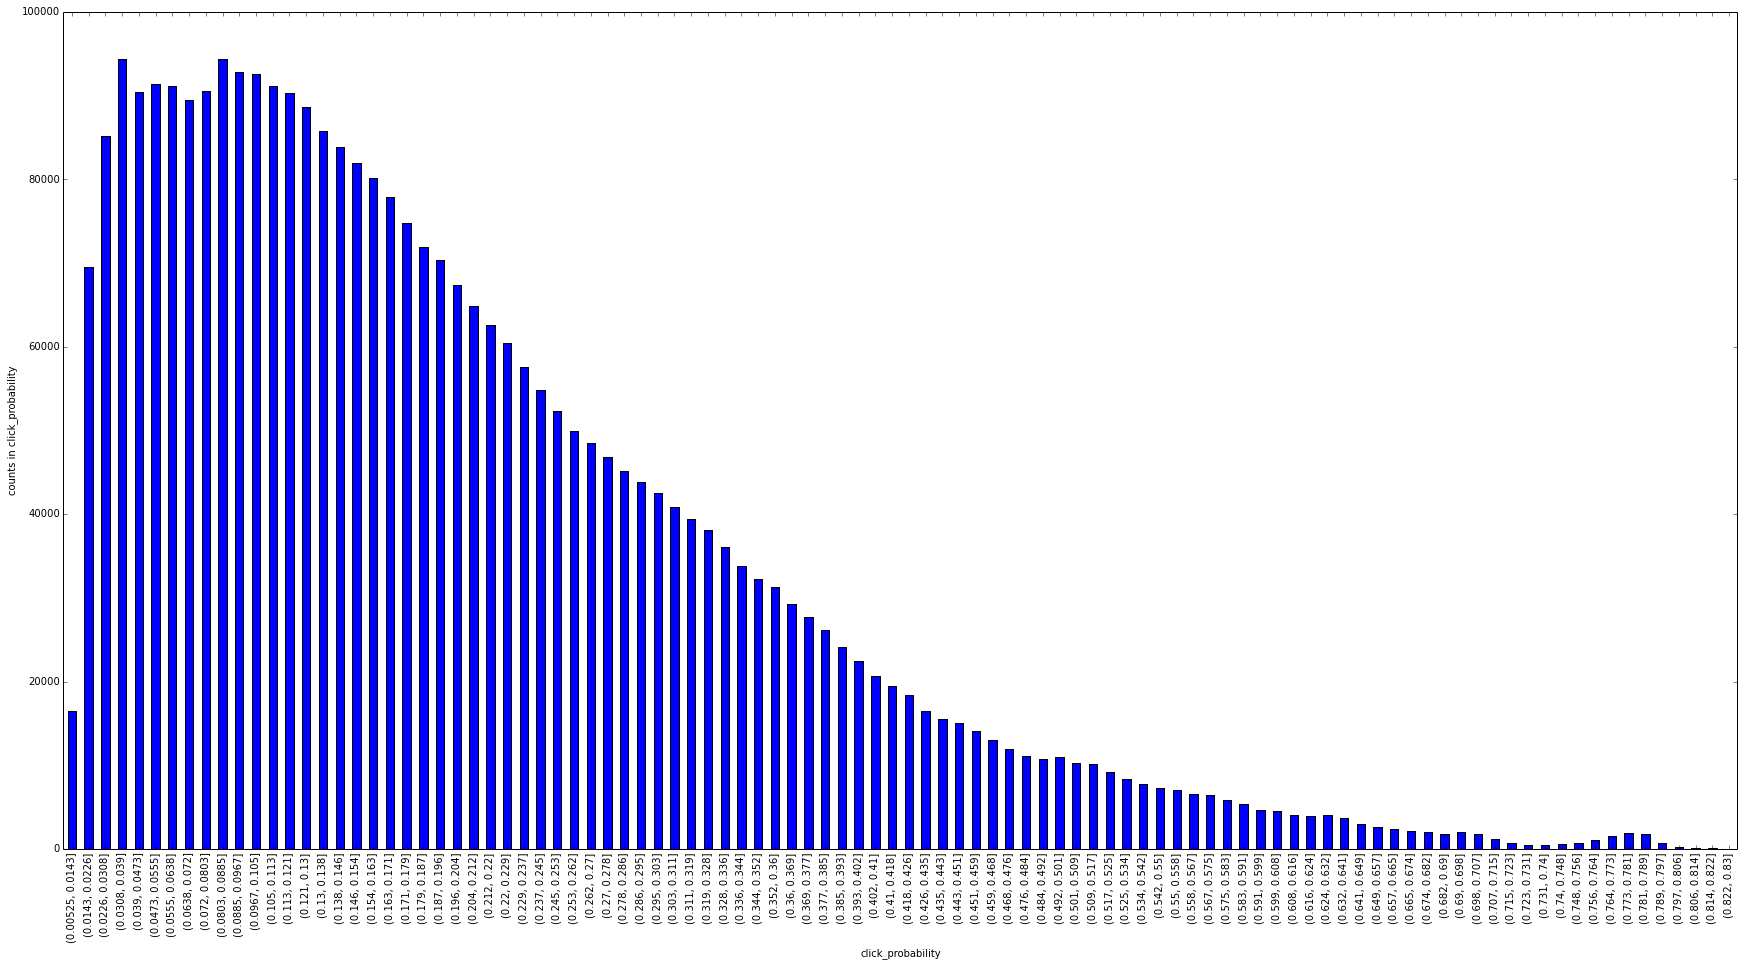

In [12]:
plot_data_cut(sub_lgbm_9, 'click_probability', 100)

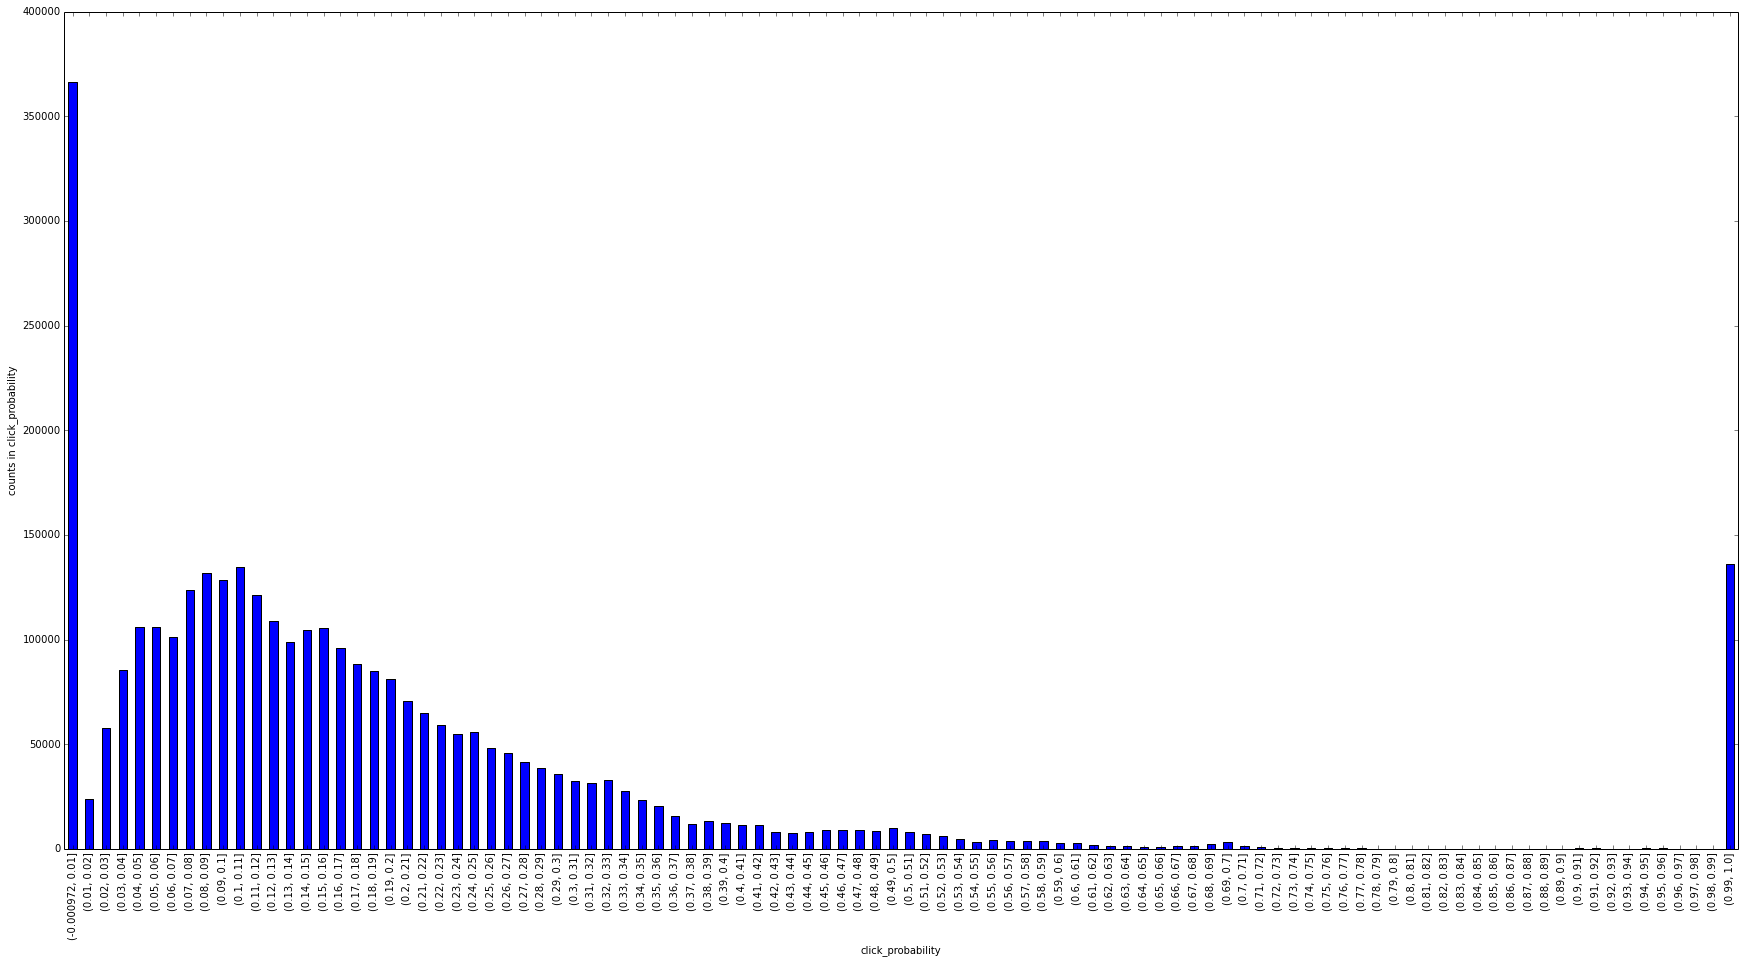

In [13]:
plot_data_cut(sub_lgbm_10, 'click_probability', 100)

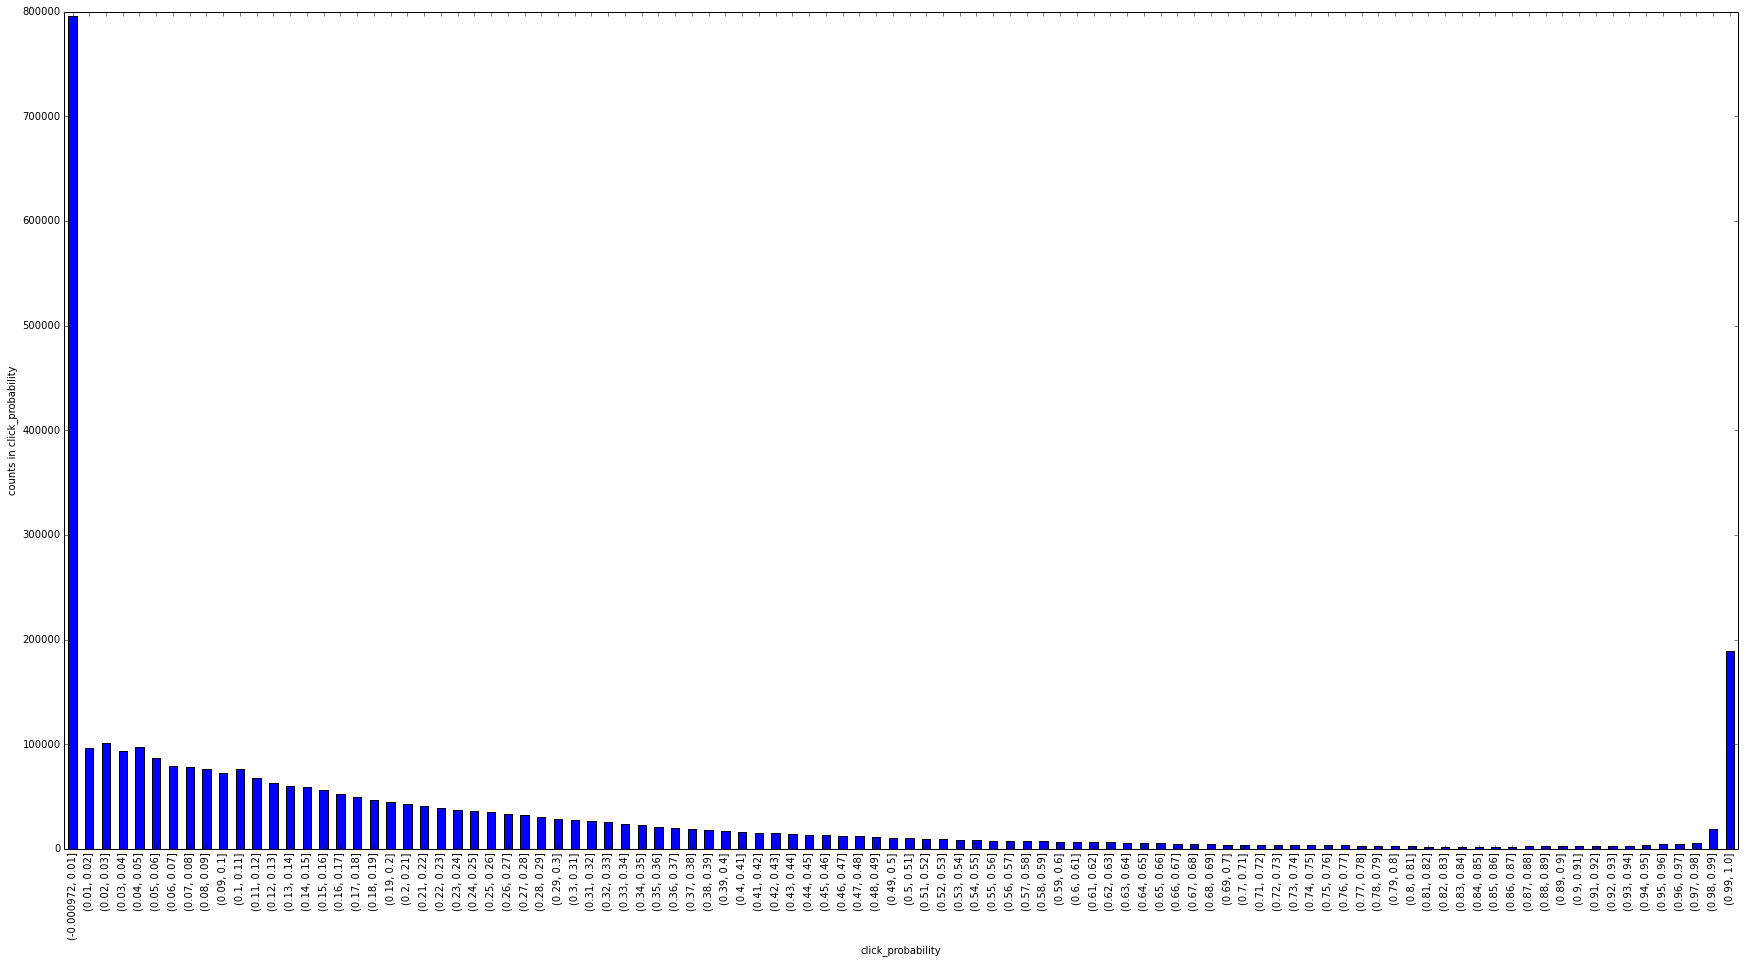

In [14]:
plot_data_cut(sub_lgbm_11, 'click_probability', 100)

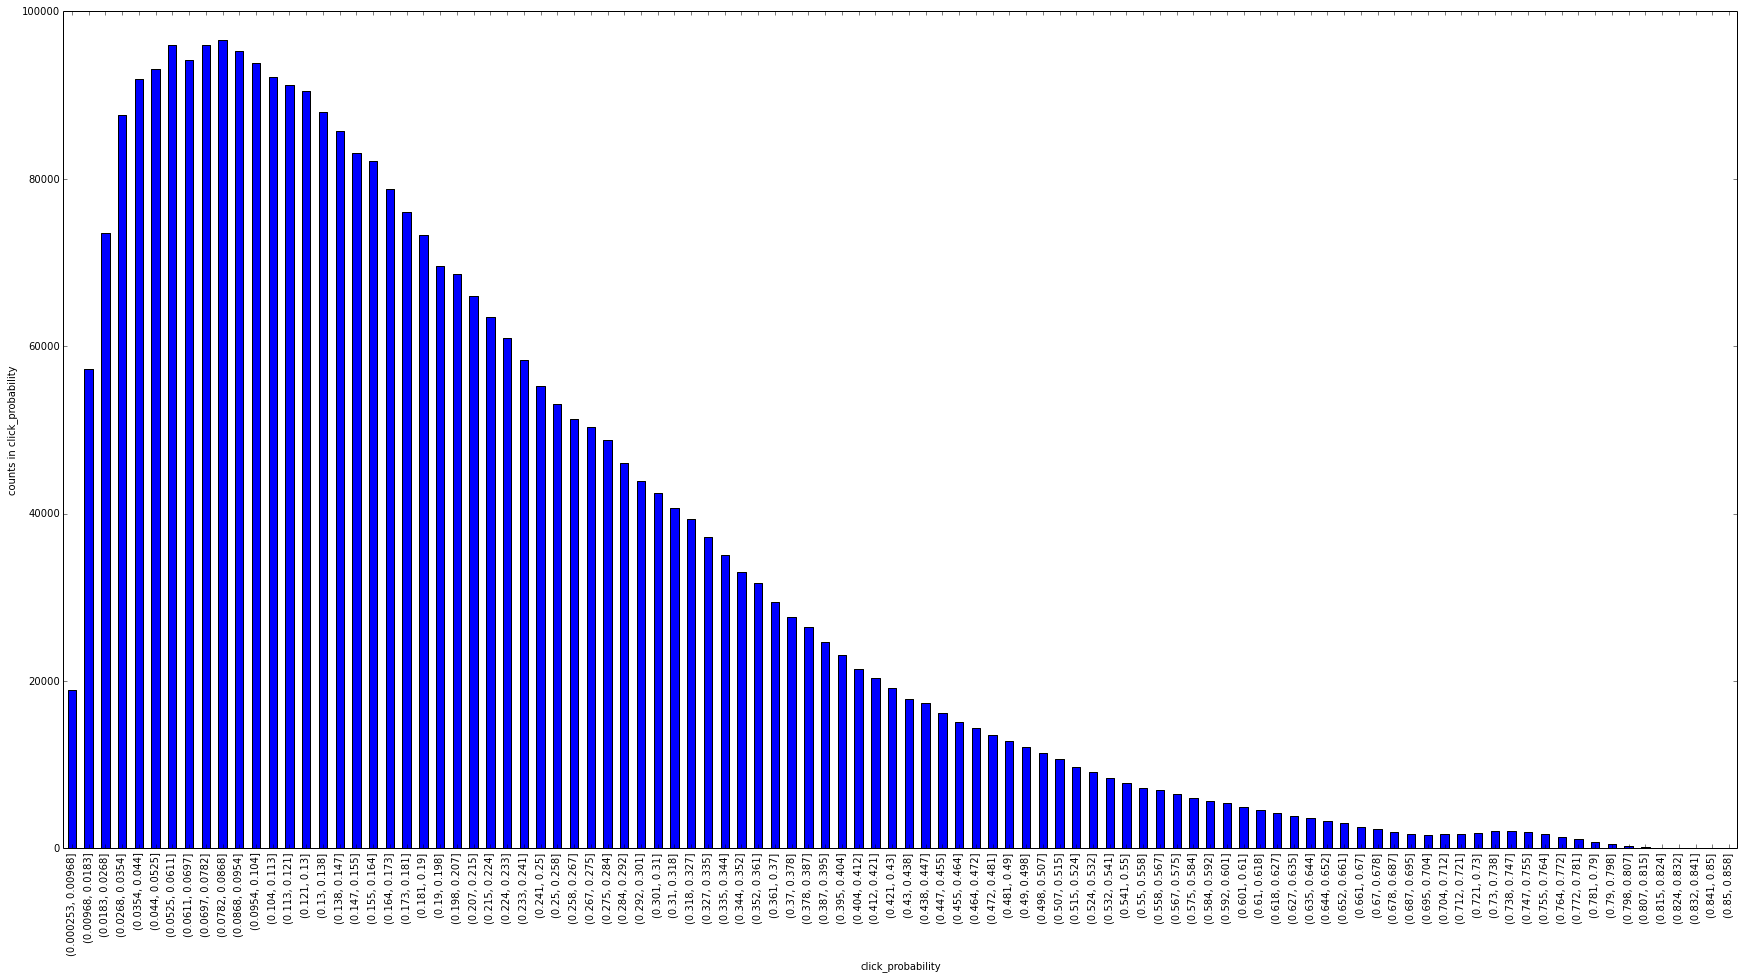

In [15]:
plot_data_cut(sub_catboost_1, 'click_probability', 100)

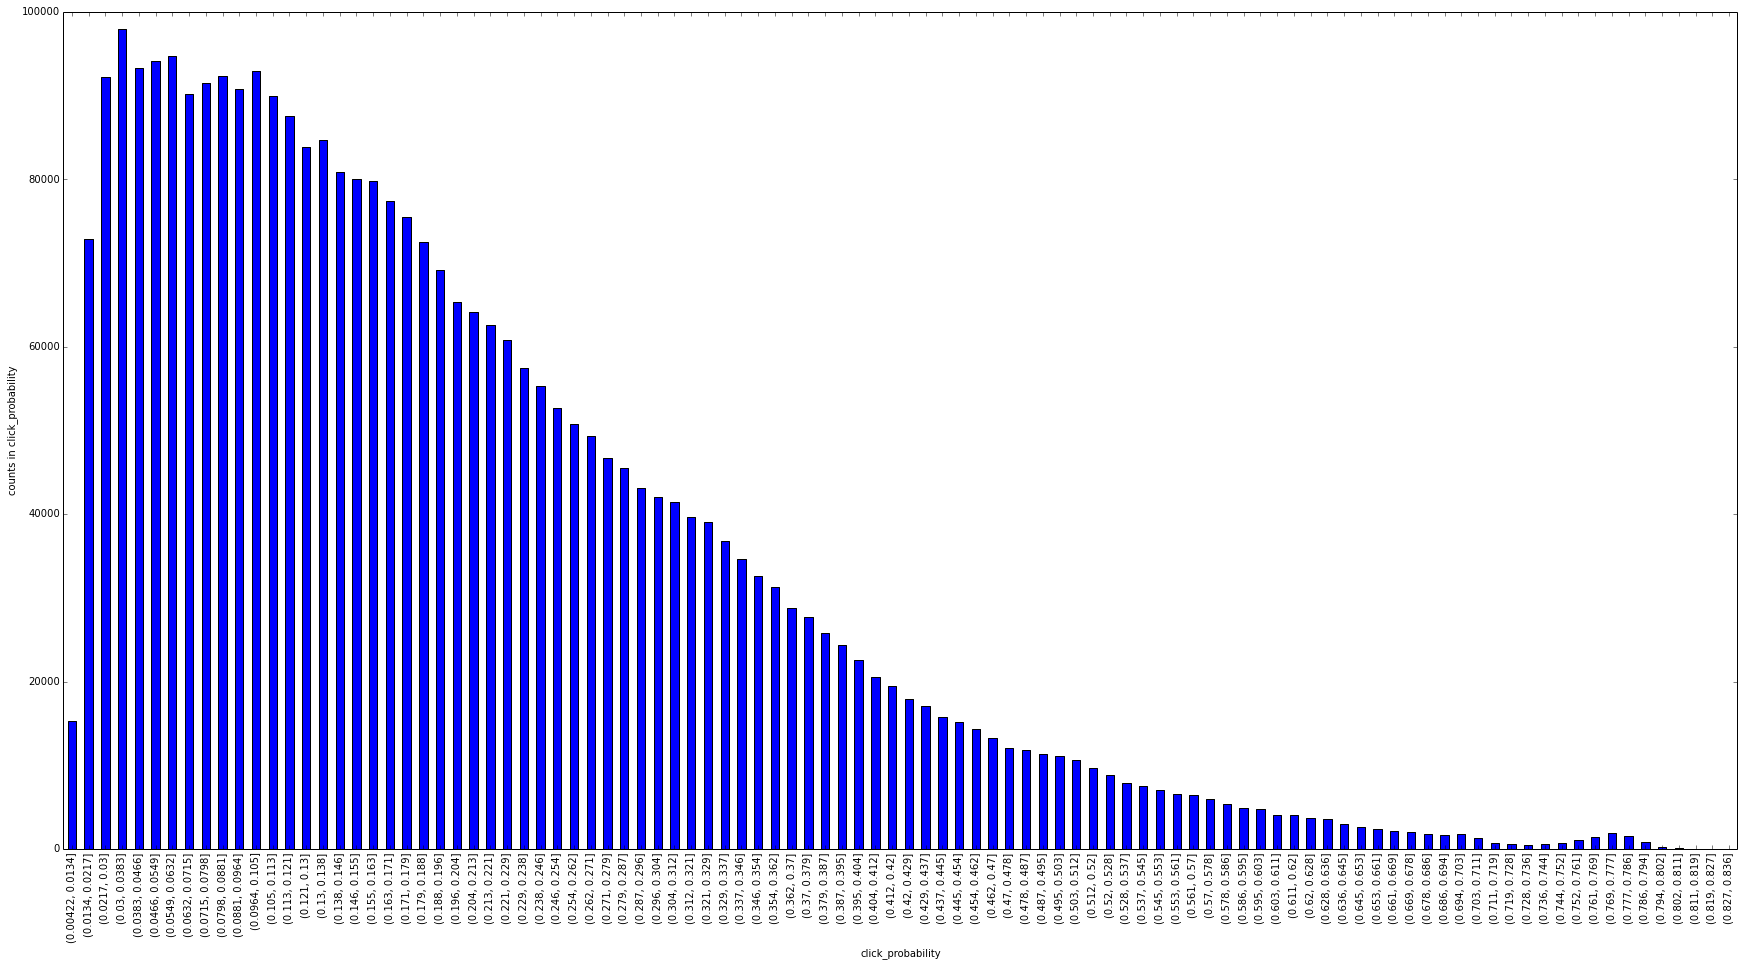

In [16]:
plot_data_cut(sub_lgbm_13, 'click_probability', 100)

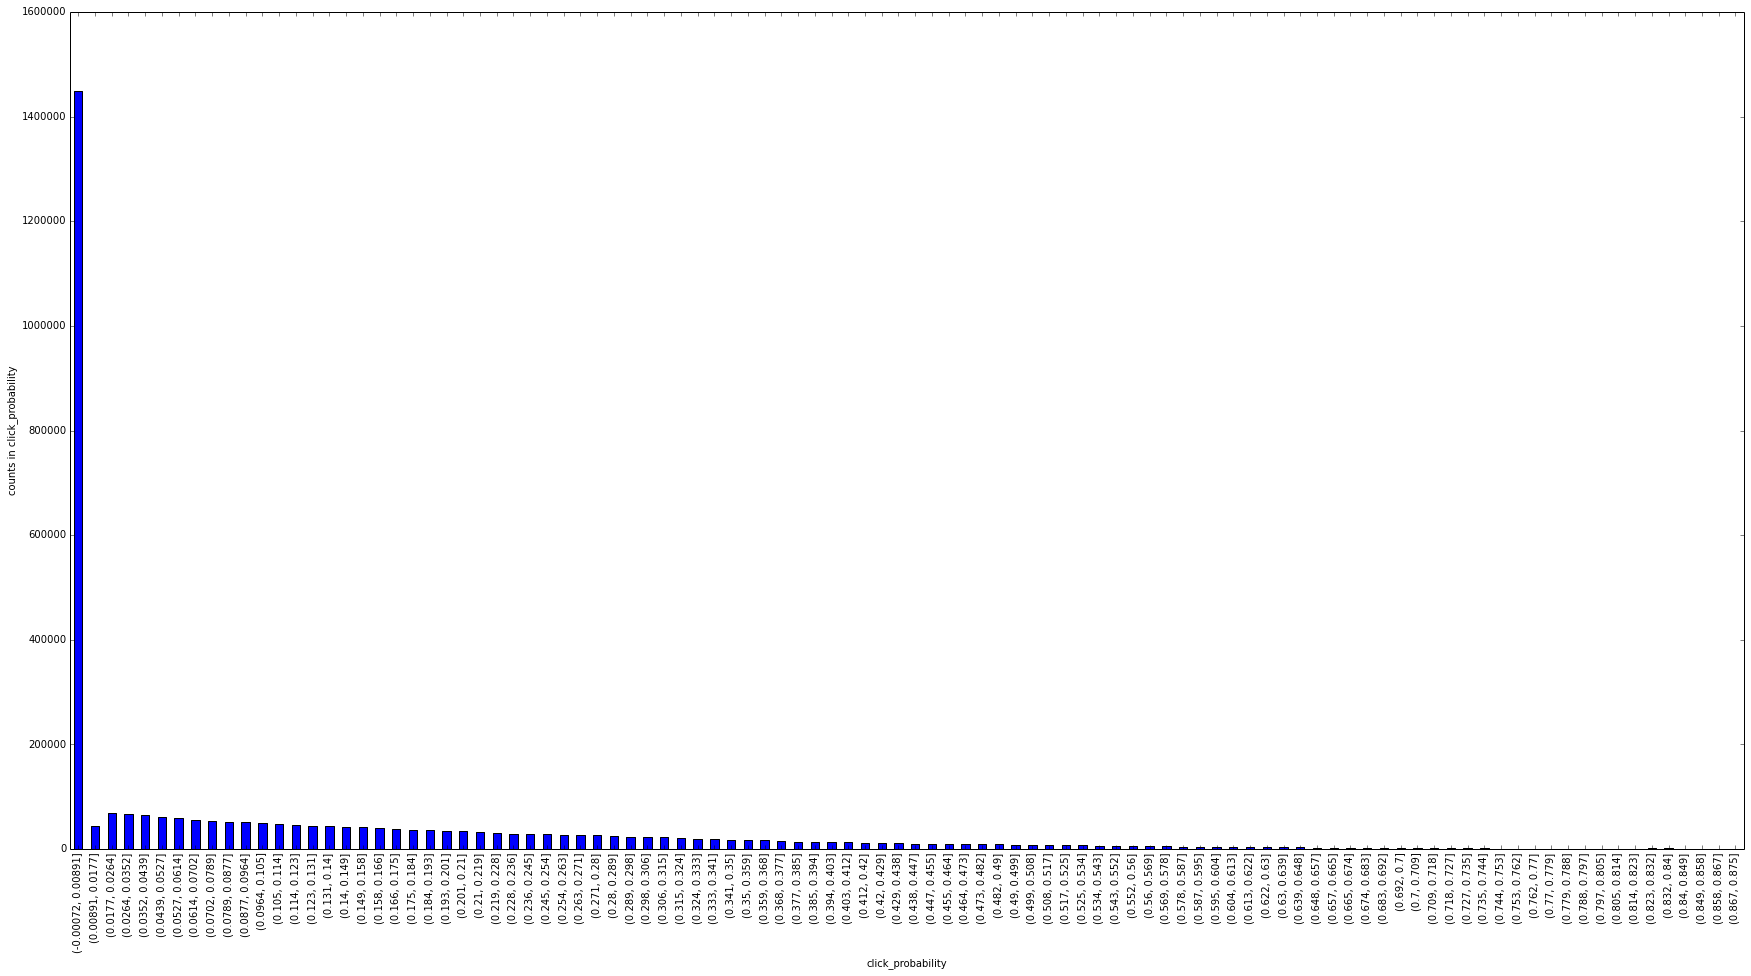

In [17]:
plot_data_cut(sub_lgbm_14, 'click_probability', 100)

In [18]:
cols = ['user_id', 'photo_id', 'browse_num', 'click_num', 'like_num', 'follow_num', 'playing_sum', 'duration_sum', 'click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio', 'browse_time_diff', 'click_freq', 'browse_freq', 'playing_freq', 'man_favor', 'woman_favor', 'man_cv_favor', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'man_yen_value_favor', 'woman_yen_value_favor', 'face_click_favor', 'non_face_click_favor', 'cover_length_favor', 'exposure_num', 'have_face_cate', 'clicked_ratio', 'face_num', 'man_num', 'woman_num', 'man_scale', 'woman_scale', 'human_scale', 'man_avg_age', 'woman_avg_age', 'human_avg_age', 'man_avg_attr', 'woman_avg_attr', 'human_avg_attr', 'cover_length', 'time', 'duration_time', 'click']

In [16]:
ensemble_train = pd.read_csv('../data/features/ensemble_feature_train.csv',
                            sep='\t')

In [ ]:
ensemble_train.head()

In [ ]:
ensemble_train.info()

In [ ]:
ensemble_test = pd.read_csv('../data/features/ensemble_feature_test.csv',
                            sep='\t')

In [37]:
ensemble_test.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time_cate,duration_time_cate
0,2,8493743,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0.000016,2,0
1,2,8676804,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,27.0,27.0,0.0,54.0,54.0,7,0.000020,2,0
2,2,8389617,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,6.0,6.0,0.0,45.0,45.0,6,0.000018,2,1
3,2,9080838,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,16.0,16.0,0.0,81.0,81.0,8,0.000020,2,2
4,2,8962078,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000023,2,0


In [23]:
ensemble_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291332 entries, 0 to 3291331
Data columns (total 43 columns):
user_id                  int64
photo_id                 int64
browse_num               int64
click_num                int64
like_num                 int64
follow_num               int64
playing_sum              int64
duration_sum             int64
click_ratio              float64
like_ratio               float64
follow_ratio             float64
playing_ratio            float64
browse_time_diff         int64
click_freq               float64
browse_freq              float64
playing_freq             float64
face_favor               float64
man_favor                float64
woman_favor              float64
man_cv_favor             float64
woman_cv_favor           float64
man_age_favor            float64
woman_age_favor          float64
man_yen_value_favor      float64
woman_yen_value_favor    float64
cover_length_favor       int64
exposure_num             int64
have_face_cate    

In [27]:
commons = ['exposure_num', 'click_ratio', 'woman_yen_value_favor', 'cover_length_favor', 'cover_length', 'browse_num', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'woman_scale', 'time', 'playing_sum', 'duration_time', 'man_cv_favor', 'woman_favor', 'click_num', 'playing_ratio', 'man_scale', 'man_yen_value_favor', 'human_scale', 'woman_avg_attr', 'man_avg_age', 'woman_avg_age', 'browse_freq', 'playing_freq', 'human_avg_attr', 'click_freq', 'browse_time_diff', 'duration_sum', 'man_favor', 'follow_ratio', 'man_avg_attr', 'human_avg_age', 'woman_num', 'like_ratio', 'follow_num', 'man_num', 'like_num', 'face_num', 'have_face_cate']

In [28]:
data = pd.concat([ensemble_train[commons], ensemble_test])

In [33]:
for col in commons:
    print(data[col].describe())

count    2.414568e+07
mean     1.876980e+02
std      3.092768e+02
min      1.000000e+00
25%      4.000000e+00
50%      4.600000e+01
75%      2.320000e+02
max      2.521000e+03
Name: exposure_num, dtype: float64
count    2.414568e+07
mean     2.038263e-01
std      1.254433e-01
min      1.022013e-02
25%      1.111943e-01
50%      1.773637e-01
75%      2.697023e-01
max      9.485792e-01
Name: click_ratio, dtype: float64
count    2.414568e+07
mean     1.369371e+01
std      7.893693e+00
min      0.000000e+00
25%      7.762897e+00
50%      1.218197e+01
75%      1.801568e+01
max      6.522712e+01
Name: woman_yen_value_favor, dtype: float64
count    2.414568e+07
mean     3.932175e+00
std      3.763455e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.600000e+01
Name: cover_length_favor, dtype: float64
count    2.414568e+07
mean     3.617865e+00
std      3.635518e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5

count     24145676
unique           2
top          False
freq      14398837
Name: have_face_cate, dtype: object


In [55]:
uint64_cols = ['time']
uint32_cols = ['playing_sum', 'browse_time_diff', 'duration_sum']
uint16_cols = ['browse_num', 'exposure_num', 'click_num', 'duration_time', 'like_num', 'follow_num']
uint8_cols = ['cover_length', 'man_num', 'woman_num', 'face_num']
bool_cols = ['have_face_cate']
float64_cols = ['clicked_ratio','non_face_click_favor', 'face_click_favor', 'man_favor', 'woman_avg_age', 'playing_freq', 'woman_age_favor', 'woman_yen_value_favor', 'human_scale', 'woman_favor', 'click_freq', 'woman_cv_favor', 'man_age_favor', 'man_yen_value_favor', 'follow_ratio', 'man_scale', 'browse_freq', 'man_avg_age', 'man_cv_favor', 'man_avg_attr', 'playing_ratio', 'woman_scale', 'click_ratio', 'human_avg_age', 'woman_avg_attr', 'like_ratio', 'cover_length_favor', 'human_avg_attr']

In [56]:
len(uint64_cols + uint32_cols + uint16_cols + uint8_cols + bool_cols+float64_cols)


43

In [31]:
import numpy as np
int_types = ["uint8", "uint16", "uint32"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------



# 内存优化
 - [用pandas处理大数据——节省90%内存消耗的小贴士](https://zhuanlan.zhihu.com/p/28531346)
 - [K 折交叉验证](https://www.szdev.com/blog/AI/model-selection-k-fold-cross-validation/)

In [19]:
import os  
from time import time  
import pandas as pd  
from memory_profiler import memory_usage

FILENAME='compressed_df'

def get_size(flnm):  
    return round(os.path.getsize(flnm) / (1024*1024), 2)

def store_df(original_df: pd.DataFrame, flnm: str, clib: str):  
    original_df.to_hdf(flnm, key='df', complib=clib, complevel=9)

def benchmark(original_df: pd.DataFrame):  
    res = {}
    for clib in ['zlib', 'lzo', 'bzip2', 'blosc', 'blosc:blosclz', 'blosc:lz4', 
                 'blosc:lz4hc', 'blosc:snappy', 'blosc:zlib', 'blosc:zstd']:
        flnm = f'{FILENAME}_{clib}.hdf'
        def strdf():
            return store_df(original_df, flnm, clib)
        started = time()
        memus = memory_usage(strdf, interval=1)
        res[clib] = {'time [s]': time() - started, 'size [MB]': get_size(flnm), 'memory_usage': memus}
    return res

SyntaxError: invalid syntax (<ipython-input-19-c63b58374d44>, line 11)

In [3]:
import numpy as np

n_features = 10

# Make some data
A = np.random.randn(3, n_features)
B = np.random.randn(5, n_features)
C = np.random.randn(4, n_features)
D = np.random.randn(7, n_features)
E = np.random.randn(9, n_features)

# Group it
K1 = np.concatenate([A, B])
K2 = np.concatenate([C, D])
K3 = E

data = np.concatenate([K1, K2, K3])

# Make some dummy prediction target
target = np.random.randn(len(data)) > 0

# Make the corresponding labels
labels = np.concatenate([[i] * len(K) for i, K in enumerate([K1, K2, K3])])

from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score

cv = LeaveOneLabelOut(labels)

# Use some classifier in crossvalidation on data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_val_score(lr, data, target, cv=cv)

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# create train and test folds from our labels:
cv_by_hand = [(np.where(labels != label)[0], np.where(labels == label)[0])
               for label in np.unique(labels)]

# We check this against our existing cv by converting the latter to a list
cv_to_list = list(cv)

print cv_by_hand
print cv_to_list

# Check equality
for (train1, test1), (train2, test2) in zip(cv_by_hand, cv_to_list):
    assert (train1 == train2).all() and (test1 == test2).all()

# Use the created cv_by_hand in cross validation
scores2 = cross_val_score(lr, data, target, cv=cv_by_hand)


# assert equality again
assert (scores == scores2).all()

[(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27]), array([0, 1, 2, 3, 4, 5, 6, 7])), (array([ 0,  1,  2,  3,  4,  5,  6,  7, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([19, 20, 21, 22, 23, 24, 25, 26, 27]))]
[(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27]), array([0, 1, 2, 3, 4, 5, 6, 7])), (array([ 0,  1,  2,  3,  4,  5,  6,  7, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([19, 20, 21, 22, 23, 24, 25, 26, 27]))]


In [5]:
#coding:utf8

# must have one line in python3 between encoding and first import statement

import os
import gc
import json
import io
import argparse
import sys
sys.path.append("..")

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, roc_auc_score, precision_score, accuracy_score
from lightgbm import LGBMClassifier

from conf.modelconf import user_action_features, face_features, user_face_favor_features, id_features, time_features, photo_features, user_features, y_label, features_to_train

from common.utils import read_data, store_data, normalize_min_max, normalize_z_score, FeatureMerger


In [22]:


USE_SAMPLE = True

model_name = 'LGBM'
fmt = 'csv'

feature_store_path = '../sample/features' if USE_SAMPLE else '../data/features'


col_feature_store_path = '../sample/features/columns' if USE_SAMPLE else '../data/features/columns'

feature_to_use = user_features + photo_features + time_features

fm_trainer = FeatureMerger(col_feature_store_path, feature_to_use+y_label, fmt=fmt, data_type='train', pool_type='process', num_workers=8)
fm_tester = FeatureMerger(col_feature_store_path, feature_to_use, fmt=fmt, data_type='test', pool_type='process', num_workers=8)

ensemble_train = fm_trainer.merge()
print(ensemble_train.info())
ensemble_test = fm_tester.merge()
print(ensemble_test.info())

all_features = list(ensemble_train.columns.values)
print("all original features")
print(all_features) 
y = ensemble_train[y_label].values

print("train features")
print(features_to_train)    

ensemble_offline = ensemble_train[features_to_train]
ensemble_online = ensemble_test[features_to_train]
# 决策树模型不需要归一化，本身就是范围划分

X = ensemble_offline.values
print(X.shape)
X_t = ensemble_online.values
print(X_t.shape)



2018-06-17 12:28:06,353 utils.py[line:37] [INFO] (browse_num, uint16, ../sample/features/columns/browse_num_train.csv)
2018-06-17 12:28:06,384 utils.py[line:37] [INFO] (click_num, uint16, ../sample/features/columns/click_num_train.csv)
2018-06-17 12:28:06,386 utils.py[line:37] [INFO] (like_num, uint16, ../sample/features/columns/like_num_train.csv)
2018-06-17 12:28:06,387 utils.py[line:37] [INFO] (follow_num, uint16, ../sample/features/columns/follow_num_train.csv)
2018-06-17 12:28:06,388 utils.py[line:37] [INFO] (playing_sum, uint32, ../sample/features/columns/playing_sum_train.csv)
2018-06-17 12:28:06,390 utils.py[line:37] [INFO] (duration_sum, uint32, ../sample/features/columns/duration_sum_train.csv)
2018-06-17 12:28:06,390 utils.py[line:37] [INFO] (click_ratio, float32, ../sample/features/columns/click_ratio_train.csv)
2018-06-17 12:28:06,391 utils.py[line:37] [INFO] (like_ratio, float32, ../sample/features/columns/like_ratio_train.csv)
2018-06-17 12:28:08,224 utils.py[line:37] [I

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120901 entries, 0 to 3120900
Data columns (total 46 columns):
user_id                  int64
photo_id                 int64
browse_num               uint16
click_num                uint16
like_num                 uint16
follow_num               uint16
playing_sum              uint32
duration_sum             uint32
click_ratio              float32
like_ratio               float32
follow_ratio             float32
playing_ratio            float32
browse_time_diff         uint32
click_freq               float32
browse_freq              float32
playing_freq             float32
man_favor                float32
woman_favor              float32
man_cv_favor             float32
woman_cv_favor           float32
man_age_favor            float32
woman_age_favor          float32
man_yen_value_favor      float32
woman_yen_value_favor    float32
face_click_favor         float32
non_face_click_favor     float32
cover_length_favor       float32
exposur

2018-06-17 12:29:53,931 utils.py[line:37] [INFO] (browse_num, uint16, ../sample/features/columns/browse_num_test.csv)
2018-06-17 12:29:53,960 utils.py[line:37] [INFO] (like_num, uint16, ../sample/features/columns/like_num_test.csv)
2018-06-17 12:29:53,960 utils.py[line:37] [INFO] (click_num, uint16, ../sample/features/columns/click_num_test.csv)
2018-06-17 12:29:53,961 utils.py[line:37] [INFO] (follow_num, uint16, ../sample/features/columns/follow_num_test.csv)
2018-06-17 12:29:53,962 utils.py[line:37] [INFO] (click_ratio, float32, ../sample/features/columns/click_ratio_test.csv)
2018-06-17 12:29:53,961 utils.py[line:37] [INFO] (playing_sum, uint32, ../sample/features/columns/playing_sum_test.csv)
2018-06-17 12:29:53,962 utils.py[line:37] [INFO] (duration_sum, uint32, ../sample/features/columns/duration_sum_test.csv)
2018-06-17 12:29:53,964 utils.py[line:37] [INFO] (like_ratio, float32, ../sample/features/columns/like_ratio_test.csv)
2018-06-17 12:29:54,278 utils.py[line:37] [INFO] (fo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489929 entries, 0 to 489928
Data columns (total 45 columns):
user_id                  489929 non-null int64
photo_id                 489929 non-null int64
browse_num               489929 non-null uint16
click_num                489929 non-null uint16
like_num                 489929 non-null uint16
follow_num               489929 non-null uint16
playing_sum              489929 non-null uint32
duration_sum             489929 non-null uint32
click_ratio              489929 non-null float32
like_ratio               489929 non-null float32
follow_ratio             489929 non-null float32
playing_ratio            489929 non-null float32
browse_time_diff         489929 non-null uint32
click_freq               489929 non-null float32
browse_freq              489929 non-null float32
playing_freq             489929 non-null float32
man_favor                489929 non-null float32
woman_favor              489929 non-null float32
man_cv_favor      

In [23]:
ensemble_train[['user_id', 'photo_id', 'time']].head()

,user_id,photo_id,time
0,2,528031,761073153303
1,2,3141045,761073449279
2,2,6410672,761072688657
3,2,6031965,761079542559
4,2,492513,761071781792


In [24]:
ensemble_train['datetime'] =  pd.to_datetime(ensemble_train['time']-8*3600*1000, utc=True, unit='ms')

In [25]:
ensemble_test['datetime'] =  pd.to_datetime(ensemble_test['time']-8*3600*1000, utc=True, unit='ms')

In [26]:
ensemble_train.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time,duration_time,click,datetime
0,2,528031,304,50,0,3,1015,6088,0.167463,0.0,...,22.0,0.0,66.0,66.0,13,0.000024,761073153303,16,False,1994-02-12 09:12:33.303
1,2,3141045,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,5,0.000017,761073449279,10,False,1994-02-12 09:17:29.279
2,2,6410672,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,2,0.000011,761072688657,13,False,1994-02-12 09:04:48.657
3,2,6031965,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,4,0.000016,761079542559,11,False,1994-02-12 10:59:02.559
4,2,492513,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,761071781792,11,False,1994-02-12 08:49:41.792


In [27]:
ensemble_test.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time,duration_time,datetime
0,2,8493743,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,4,0.000016,761163868705,11,1994-02-13 10:24:28.705
1,2,8676804,304,50,0,3,1015,6088,0.167463,0.0,...,27.0,27.0,0.0,54.0,54.0,7,0.000020,761163868705,7,1994-02-13 10:24:28.705
2,2,8389617,304,50,0,3,1015,6088,0.167463,0.0,...,6.0,6.0,0.0,45.0,45.0,6,0.000018,761165874501,47,1994-02-13 10:57:54.501
3,2,9080838,304,50,0,3,1015,6088,0.167463,0.0,...,16.0,16.0,0.0,81.0,81.0,8,0.000020,761163868705,140,1994-02-13 10:24:28.705
4,2,8962078,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.000023,761165874501,4,1994-02-13 10:57:54.501


In [28]:
import datetime
datetime.datetime(2017,8,15,20,12,1,10)

datetime.datetime(2017, 8, 15, 20, 12, 1, 10)

In [29]:
ensemble_train['datetime'].min()

Timestamp('1994-02-11 11:28:40.751000')

In [30]:
ensemble_train['datetime'].max()

Timestamp('1994-02-12 23:34:41.054000')

In [31]:
ensemble_test['datetime'].min()

Timestamp('1994-02-12 23:36:06.356000')

In [36]:
ensemble_test['datetime'].max()

Timestamp('1994-02-13 11:34:28.776000')

In [121]:
ensemble_train.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,avg_tfidf,time,duration_time,click,datetime
0,2,528031,304,50,0,3,1015,6088,0.167463,0.0,...,22.0,0.0,66.0,66.0,13,0.000024,761073153303,16,False,1994-02-12 09:12:33.303
1,2,3141045,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,5,0.000017,761073449279,10,False,1994-02-12 09:17:29.279
2,2,6410672,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,2,0.000011,761072688657,13,False,1994-02-12 09:04:48.657
3,2,6031965,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,4,0.000016,761079542559,11,False,1994-02-12 10:59:02.559
4,2,492513,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,761071781792,11,False,1994-02-12 08:49:41.792


In [81]:
start = pd.datetime(1994, 2, 11, 11, 28, 40, 751000)
interval1 = pd.datetime(1994, 2, 11, 23, 30,40, 751000)
interval2 = pd.datetime(1994, 2, 12, 11, 30,40, 751000)
end = pd.datetime(1994, 2, 12, 23, 34,41, 54000)

In [129]:
ensemble_train.shape

(3120901, 47)

In [130]:
train_start = pd.datetime(1994, 2, 11, 11, 28, 40, 751000)
train_end = pd.datetime(1994, 2, 12, 11, 30,40, 751000)
val_end = pd.datetime(1994, 2, 12, 23, 34,41, 54000)
train_data = ensemble_train[(ensemble_train['datetime']>=train_start) & (ensemble_train['datetime']<train_end)]
train_data.shape

(2107831, 47)

In [131]:
val_data = ensemble_train[(ensemble_train['datetime']>=train_end) & (ensemble_train['datetime']<=val_end)]
val_data.shape

(1013070, 47)

In [132]:
val_photo_ids = list(set(val_data['photo_id'].unique()) - set(train_data['photo_id'].unique()))
len(val_photo_ids)

335861

In [133]:
val_data = val_data.loc[val_data.photo_id.isin(val_photo_ids)]
val_data.shape

(658609, 47)

In [142]:
train_start = pd.datetime(1994, 2, 11, 11, 28, 40, 751000)
train_end = pd.datetime(1994, 2, 12, 11, 30,40, 751000)
val_end = pd.datetime(1994, 2, 12, 23, 34,41, 54000)

(2184630, 47)
(936271, 47)
(608079, 47)


In [143]:
int(train_end.strftime("%s")) * 1000

761023840000

In [144]:
pd.Timestamp(train_end)

761052640751000000

In [122]:
X_train, X_test, y_train, y_test = train_data[features_to_train], val_data[features_to_train], train_data[y_label], val_data[y_label]

In [101]:
cv_by_hand = []
train_index = np.where((ensemble_train['datetime']>=start) & (ensemble_train['datetime']<interval2))[0]
val_index = np.where((ensemble_train['datetime']>=interval2) & (ensemble_train['datetime']<=end))[0]
cv_by_hand.append((train_index, val_index))
cv_by_hand.append((np.where((ensemble_train['datetime']<interval1) | (ensemble_train['datetime']>interval2))[0], np.where((ensemble_train['datetime']>=interval1) & (ensemble_train['datetime']<=interval2))[0]))
cv_by_hand.append((np.where((ensemble_train['datetime']>interval1) & (ensemble_train['datetime']<=end))[0], np.where((ensemble_train['datetime']>=start) & (ensemble_train['datetime']<=interval1))[0]))

In [95]:
# [i for i, val in enumerate(train_index.values) if val]

In [99]:
np.where((ensemble_train['datetime']>=start) & (ensemble_train['datetime']<interval2))[0]

array([      0,       1,       2, ..., 3120888, 3120890, 3120899])

In [103]:
print('Training model %s......' % model_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# X_train, X_test, y_train, y_test = train_data[features_to_train].values, val_data[features_to_train].values, train_data[y_label].values, val_data[y_label].values

print(y_train.mean(), y_train.std())
print(y_test.mean(), y_test.std())

Training model LGBM......
(0.20195523392362422, 0.40145898596802954)
(0.2024647100975048, 0.4018367221430093)


In [110]:
clf = LGBMClassifier(verbose=1)
# KFold cross validation
print('StratifiedKFold cross validation......')
for train,val in cv_by_hand:
    X_train = X[train]
    y_train = y[train]
    X_val = X[val]
    y_val=  y[val]
    k = 3
#     cv = StratifiedKFold(n_splits=k, random_state=0, shuffle=False)
    clf.fit(X_train, y_train.ravel())
#     scores = cross_val_score(clf, X_train, y_train.ravel(), cv=cv, scoring='roc_auc')
#     print('%d Fold scores: %s' % (k, scores))
#     print("ROC/AUC Accuracy: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() ** 2))
#     roc_auc = scores.mean()

    precision = precision_score(y_val, clf.predict(X_val))
    recall = recall_score(y_val, clf.predict(X_val), average='macro')
    accuracy = accuracy_score(y_val, clf.predict(X_val))
    print("{:31} 测试集precision/recall: {:15}/{:15}".format(model_name, precision, recall))
    print("{:31} 测试集accuracy: {:15}".format(model_name, accuracy))
    try:
        y_score = clf.decision_function(X_val)[:, 1]
    except AttributeError:
        print('{} has no decision_function, use predict func.'.format(model_name))
        y_score = clf.predict_proba(X_val)[:, 1]



    # Compute ROC curve and ROC area for each class
    roc_auc = roc_auc_score(y_val, y_score, sample_weight=None)
    # Plot ROC curve
    print('{} ROC curve (area = {})'.format(model_name, roc_auc))

precision = precision_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test), average='macro')
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("{:31} 测试集precision/recall: {:15}/{:15}".format(model_name, precision, recall))
print("{:31} 测试集accuracy: {:15}".format(model_name, accuracy))

StratifiedKFold cross validation......


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集precision/recall:  0.603526759125/ 0.558593554313
LGBM                            测试集accuracy:  0.809814721589
LGBM has no decision_function, use predict func.
LGBM ROC curve (area = 0.752053573511)


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集precision/recall:  0.600120809423/  0.55641388737
LGBM                            测试集accuracy:  0.805611691675
LGBM has no decision_function, use predict func.
LGBM ROC curve (area = 0.753607859804)


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集precision/recall:  0.609218985091/ 0.553435053919
LGBM                            测试集accuracy:  0.806447985513
LGBM has no decision_function, use predict func.
LGBM ROC curve (area = 0.751332570682)


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集precision/recall:  0.607353353915/ 0.556386003651
LGBM                            测试集accuracy:  0.807191585963


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [148]:
ensemble_train = ensemble_train.sort_values('time')
train_num = ensemble_train.shape[0]
train_data = ensemble_train.iloc[:int(train_num * 0.7)].copy()
print(train_data.shape)
val_data = ensemble_train.iloc[int(train_num * 0.7):].copy()
print(val_data.shape)
val_photo_ids = list(set(val_data['photo_id'].unique()) - set(train_data['photo_id'].unique()))
val_data = val_data.loc[val_data.photo_id.isin(val_photo_ids)]
print(val_data.shape)
X_train, X_test, y_train, y_test = train_data[features_to_train].values, val_data[features_to_train].values, train_data[y_label].values, val_data[y_label].values
clf = LGBMClassifier(verbose=1)
clf.fit(X_train, y_train.ravel())

precision = precision_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test), average='macro')
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("{:31} 测试集precision/recall: {:15}/{:15}".format(model_name, precision, recall))
print("{:31} 测试集accuracy: {:15}".format(model_name, accuracy))


(2184630, 47)
(936271, 47)
(608079, 47)


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


LGBM                            测试集precision/recall:  0.614555756816/ 0.551065908146
LGBM                            测试集accuracy:  0.825004645778


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
clf = LGBMClassifier(verbose=1)
# KFold cross validation
print('StratifiedKFold cross validation......')
for train,val in cv_by_hand:
    X_train = X[train]
    y_train = y[train]
    X_val = X[val]
    y_val=  y[val]
    k = 2
    cv = StratifiedKFold(n_splits=k, random_state=0, shuffle=False)
    clf.fit(X_train, y_train.ravel())
    scores = cross_val_score(clf, X_train, y_train.ravel(), cv=cv, scoring='roc_auc')
    print('%d Fold scores: %s' % (k, scores))
    print("ROC/AUC Accuracy: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() ** 2))
    roc_auc = scores.mean()

    precision = precision_score(y_val, clf.predict(X_val))
    recall = recall_score(y_val, clf.predict(X_val), average='macro')
    accuracy = accuracy_score(y_val, clf.predict(X_val))
    print("{:31} 测试集precision/recall: {:15}/{:15}".format(model_name, precision, recall))
    print("{:31} 测试集accuracy: {:15}".format(model_name, accuracy))
    try:
        y_score = clf.decision_function(X_val)[:, 1]
    except AttributeError:
        print('{} has no decision_function, use predict func.'.format(model_name))
        y_score = clf.predict_proba(X_val)[:, 1]



    # Compute ROC curve and ROC area for each class
    roc_auc = roc_auc_score(y_val, y_score, sample_weight=None)
    # Plot ROC curve
    print('{} ROC curve (area = {})'.format(model_name, roc_auc))

precision = precision_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test), average='macro')
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("{:31} 测试集precision/recall: {:15}/{:15}".format(model_name, precision, recall))
print("{:31} 测试集accuracy: {:15}".format(model_name, accuracy))

In [6]:
import os
import time
import argparse
import sys

sys.path.append("..")

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



from conf.modelconf import user_action_features, face_features, user_face_favor_features, id_features, time_features, \
    photo_features, user_features, y_label, features_to_train, cate_features_to_train

from common.utils import read_data, store_data, FeatureMerger, normalize_min_max, normalize_z_score
from common.base import Classifier

In [30]:
USE_SAMPLE = True

model_name = 'lr-cate'
fmt = 'csv'
version = '999'
desc = '测试'

feature_store_path = '../sample/features' if USE_SAMPLE else '../data/features'
model_store_path = './sample/' if USE_SAMPLE else './data'

col_feature_store_path = '../sample/features/columns' if USE_SAMPLE else '../data/features/columns'


cont_features_to_train = ['click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio', 'browse_time_diff', 'click_freq', 'browse_freq',
             'playing_freq', 'man_favor', 'woman_favor', 'man_cv_favor', 'woman_cv_favor', 'man_age_favor',
             'woman_age_favor', 'man_yen_value_favor', 'woman_yen_value_favor', 'face_click_favor',
             'non_face_click_favor', 'cover_length_favor',  'man_scale', 'woman_scale', 'human_scale', 'man_avg_age',
            'woman_avg_age', 'human_avg_age', 'man_avg_attr', 'woman_avg_attr', 'human_avg_attr', 'avg_tfidf',
            'period_click_ratio', 'woman_num_ratio', 'man_num_ratio']
cate_features_to_train = ['time_cate', 'duration_time_cate', 'browse_num_cate', 'click_num_cate', 'like_num_cate',
                          'follow_num_cate', 'playing_sum_cate', 'duration_sum_cate','exposure_num_cate', 'face_num_cate',
                          'man_num_cate', 'woman_num_cate', 'cover_length_cate', 'key_words_num_cate', 'have_face_cate', 'have_text_cate']
features_to_train = cont_features_to_train + cate_features_to_train

model = Classifier(clf=None, dir=model_store_path,
                   name=model_name, version=version,
                   description=desc, features_to_train=features_to_train)

fm_trainer = FeatureMerger(col_feature_store_path, features_to_train + y_label, fmt=fmt, data_type='train',
                           pool_type='process', num_workers=8)
fm_tester = FeatureMerger(col_feature_store_path, features_to_train, fmt=fmt, data_type='test', pool_type='process',
                          num_workers=8)
ensemble_train = fm_trainer.merge()
ensemble_test = fm_tester.merge()


print(ensemble_train.info())
print(ensemble_test.info())



2018-06-22 19:44:15,811 utils.py[line:37] [INFO] (click_ratio, float32, ../sample/features/columns/click_ratio_train.csv)
2018-06-22 19:44:15,849 utils.py[line:37] [INFO] (playing_ratio, float32, ../sample/features/columns/playing_ratio_train.csv)
2018-06-22 19:44:15,850 utils.py[line:37] [INFO] (click_freq, float32, ../sample/features/columns/click_freq_train.csv)
2018-06-22 19:44:15,848 utils.py[line:37] [INFO] (follow_ratio, float32, ../sample/features/columns/follow_ratio_train.csv)
2018-06-22 19:44:15,852 utils.py[line:37] [INFO] (browse_freq, float32, ../sample/features/columns/browse_freq_train.csv)
2018-06-22 19:44:15,850 utils.py[line:37] [INFO] (browse_time_diff, uint32, ../sample/features/columns/browse_time_diff_train.csv)
2018-06-22 19:44:15,848 utils.py[line:37] [INFO] (like_ratio, float32, ../sample/features/columns/like_ratio_train.csv)
2018-06-22 19:44:15,859 utils.py[line:37] [INFO] (playing_freq, float32, ../sample/features/columns/playing_freq_train.csv)
2018-06-22 

2018-06-22 19:46:48,262 utils.py[line:37] [INFO] (man_yen_value_favor, float32, ../sample/features/columns/man_yen_value_favor_test.csv)
2018-06-22 19:46:48,326 utils.py[line:37] [INFO] (woman_yen_value_favor, float32, ../sample/features/columns/woman_yen_value_favor_test.csv)
2018-06-22 19:46:48,723 utils.py[line:37] [INFO] (face_click_favor, float32, ../sample/features/columns/face_click_favor_test.csv)
2018-06-22 19:46:48,821 utils.py[line:37] [INFO] (non_face_click_favor, float32, ../sample/features/columns/non_face_click_favor_test.csv)
2018-06-22 19:46:48,871 utils.py[line:37] [INFO] (cover_length_favor, float32, ../sample/features/columns/cover_length_favor_test.csv)
2018-06-22 19:46:48,871 utils.py[line:37] [INFO] (woman_scale, float32, ../sample/features/columns/woman_scale_test.csv)
2018-06-22 19:46:48,872 utils.py[line:37] [INFO] (human_scale, float32, ../sample/features/columns/human_scale_test.csv)
2018-06-22 19:46:48,876 utils.py[line:37] [INFO] (man_avg_age, float32, ../

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120901 entries, 0 to 3120900
Data columns (total 51 columns):
user_id                  int64
photo_id                 int64
click_ratio              float32
like_ratio               float32
follow_ratio             float32
playing_ratio            float32
browse_time_diff         uint32
click_freq               float32
browse_freq              float32
playing_freq             float32
man_favor                float32
woman_favor              float32
man_cv_favor             float32
woman_cv_favor           float32
man_age_favor            float32
woman_age_favor          float32
man_yen_value_favor      float32
woman_yen_value_favor    float32
face_click_favor         float32
non_face_click_favor     float32
cover_length_favor       float32
man_scale                float32
woman_scale              float32
human_scale              float32
man_avg_age              float32
woman_avg_age            float32
human_avg_age            float32
m

In [31]:
ensemble_test.head()

,user_id,photo_id,click_ratio,like_ratio,follow_ratio,playing_ratio,browse_time_diff,click_freq,browse_freq,playing_freq,...,playing_sum_cate,duration_sum_cate,exposure_num_cate,face_num_cate,man_num_cate,woman_num_cate,cover_length_cate,key_words_num_cate,have_face_cate,have_text_cate
0,2,8493743,0.167463,0.0,0.009868,0.166721,55220,0.000905,0.005505,0.018381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2,8676804,0.167463,0.0,0.009868,0.166721,55220,0.000905,0.005505,0.018381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2,2,8389617,0.167463,0.0,0.009868,0.166721,55220,0.000905,0.005505,0.018381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
3,2,9080838,0.167463,0.0,0.009868,0.166721,55220,0.000905,0.005505,0.018381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
4,2,8962078,0.167463,0.0,0.009868,0.166721,55220,0.000905,0.005505,0.018381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [ ]:
all_features = list(ensemble_train.columns.values)
print("all original features")

print(all_features)
y = ensemble_train[y_label].values

# features_to_train = list(set(all_features) - set(['user_id', 'photo_id', 'click', 'browse_time_diff']))
print("train features")
print(features_to_train)
num_train, num_test = ensemble_train.shape[0], ensemble_test.shape[0]
ensemble_data = pd.concat(
    [ensemble_train[id_features + features_to_train], ensemble_test[id_features + features_to_train]])
normalize_min_max(ensemble_data, cont_features_to_train)
train = ensemble_data.iloc[:num_train, :]
ensemble_train = pd.concat([train, ensemble_train[y_label]], axis=1)
ensemble_test = ensemble_data.iloc[num_train:, :]


# ensemble_train = ensemble_train.sort_values('time')
train_num = ensemble_train.shape[0]
train_data = ensemble_train.iloc[:int(train_num * 0.7)].copy()
print(train_data.shape)
y_train = train_data[y_label].values
val_data = ensemble_train.iloc[int(train_num * 0.7):].copy()
print(val_data.shape)
val_photo_ids = list(set(val_data['photo_id'].unique()) - set(train_data['photo_id'].unique()))
val_data = val_data.loc[val_data.photo_id.isin(val_photo_ids)]
y_val = val_data[y_label].values
print(val_data.shape)




In [24]:
num_train, num_val, num_test = train_data.shape[0], val_data.shape[0], ensemble_test.shape[0]
ensemble_data = pd.concat([train_data[features_to_train], val_data[features_to_train], ensemble_test[features_to_train]])


In [26]:
cate_feats = cate_features_to_train
cate_feats_indexes = [ensemble_data.columns.get_loc(c) for c in ensemble_data.columns if c in cate_feats]

ensemble_data.columns

Index([u'click_ratio', u'like_ratio', u'follow_ratio', u'playing_ratio',
       u'browse_time_diff', u'click_freq', u'browse_freq', u'playing_freq',
       u'man_favor', u'woman_favor', u'man_cv_favor', u'woman_cv_favor',
       u'man_age_favor', u'woman_age_favor', u'man_yen_value_favor',
       u'woman_yen_value_favor', u'face_click_favor', u'non_face_click_favor',
       u'cover_length_favor', u'man_scale', u'woman_scale', u'human_scale',
       u'man_avg_age', u'woman_avg_age', u'human_avg_age', u'man_avg_attr',
       u'woman_avg_attr', u'human_avg_attr', u'avg_tfidf',
       u'period_click_ratio', u'woman_num_ratio', u'man_num_ratio',
       u'time_cate', u'duration_time_cate', u'browse_num_cate',
       u'click_num_cate', u'like_num_cate', u'follow_num_cate',
       u'playing_sum_cate', u'duration_sum_cate', u'exposure_num_cate',
       u'face_num_cate', u'man_num_cate', u'woman_num_cate',
       u'cover_length_cate', u'key_words_num_cate', u'have_face_cate',
       u'have_text_

In [27]:
cate_feats_indexes

[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]

In [17]:
ensemble_data.head()

,click_ratio,like_ratio,follow_ratio,playing_ratio,browse_time_diff,click_freq,browse_freq,playing_freq,man_favor,woman_favor,...,playing_sum_cate,duration_sum_cate,exposure_num_cate,face_num_cate,man_num_cate,woman_num_cate,cover_length_cate,key_words_num_cate,have_face_cate,have_text_cate
0,0.173439,0.0,0.041941,0.078033,0.42294,0.030471,0.044317,0.038671,0.084,0.124348,...,0.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,True,True
1,0.173439,0.0,0.041941,0.078033,0.42294,0.030471,0.044317,0.038671,0.084,0.124348,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,False,True
2,0.173439,0.0,0.041941,0.078033,0.42294,0.030471,0.044317,0.038671,0.084,0.124348,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False,True
3,0.173439,0.0,0.041941,0.078033,0.42294,0.030471,0.044317,0.038671,0.084,0.124348,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,False,True
4,0.173439,0.0,0.041941,0.078033,0.42294,0.030471,0.044317,0.038671,0.084,0.124348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [28]:
np.sum(ensemble_data.isnull())

click_ratio                   0
like_ratio                    0
follow_ratio                  0
playing_ratio                 0
browse_time_diff              0
click_freq                    0
browse_freq                   0
playing_freq                  0
man_favor                     0
woman_favor                   0
man_cv_favor                  0
woman_cv_favor                0
man_age_favor                 0
woman_age_favor               0
man_yen_value_favor           0
woman_yen_value_favor         0
face_click_favor              0
non_face_click_favor          0
cover_length_favor            0
man_scale                     0
woman_scale                   0
human_scale                   0
man_avg_age                   0
woman_avg_age                 0
human_avg_age                 0
man_avg_attr                  0
woman_avg_attr                0
human_avg_attr                0
avg_tfidf                     0
period_click_ratio       489929
woman_num_ratio          489929
man_num_

In [18]:
ensemble_data = ensemble_data.values
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(categorical_features=cate_feats_indexes)
# 2. FIT
enc.fit(ensemble_data)
# 3. Transform
ensemble_data = enc.transform(ensemble_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').